# Football passmap by Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

Có thể vẽ đường pitch bằng matplotlib nhưng sẽ khá dài nên mình sử dụng thư viện mplsoccer để thực hiện nhanh hơn

In [3]:
import os
import matplotlib.patches as patches

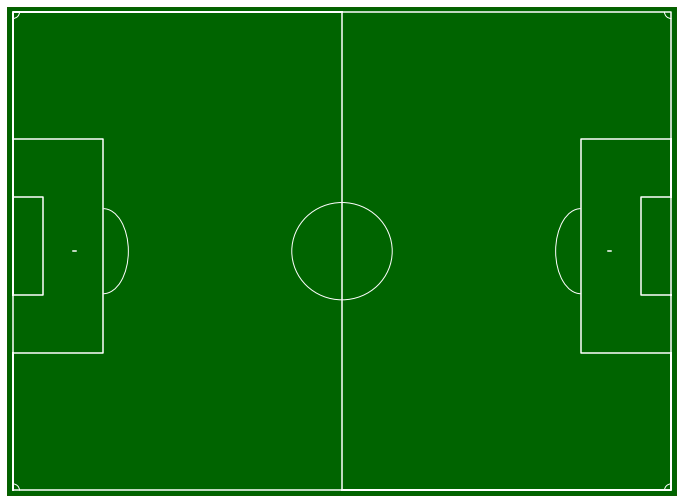

In [4]:
def draw_soccer_pitch(figsize=(12, 9)):
    """
    Function that plots a scaled soccer pitch of length 120*90 metres which 
    are the maximum dimensions allowed by FIFAs "Laws Of The Game"
    """
    rect = patches.Rectangle((-1, -1), 122, 92, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)
    # Main pitch markings, ie sidelines, penalty area and halfway line
    plt.plot([0, 0,  0, 120, 120, 0,     0,  16.5,  16.5,     0,     0,   5.5,   5.5, 
                  0,  0, 60, 60, 120,   120, 103.5, 103.5,   120,   120, 114.5, 114.5,   120], 
             [0, 0, 90,  90,   0, 0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 
              36.85, 90, 90,  0,   0, 25.85, 25.85, 66.15, 66.15, 55.15, 55.15, 36.85, 36.85], color='white')
    
    # Secondary pitch markings, ie penalty spots, centre circle etc
    plt.plot([11, 11.5],[45, 45], color='white')
    plt.plot([109, 108.5],[45, 45], color='white')
    
    centre_circle = patches.Circle([60, 45], 9.15, edgecolor='white', facecolor='darkgreen')
    ax.add_patch(centre_circle)
    
    left_arc = patches.Arc([16.5, 45], 9.15, 16, theta1=270.0, theta2=90.0, color='white')
    ax.add_patch(left_arc)
    right_arc = patches.Arc([103.5, 45], 9.15, 16, theta1=90.0, theta2=270.0, color='white')
    ax.add_patch(right_arc)
    
    bl_corner = patches.Arc([0, 0], 2.5, 2.5, theta1=0.0, theta2=90.0, color='white')
    tl_corner = patches.Arc([0, 90], 2.5, 2.5, theta1=270.0, color='white')
    br_corner = patches.Arc([120, 0], 2.5, 2.5, theta1=90.0, theta2=180.0, color='white')
    tr_corner = patches.Arc([120, 90], 2.5, 2.5, theta1=180.0, theta2=270.0,color='white')
    ax.add_patch(bl_corner)
    ax.add_patch(tl_corner)
    ax.add_patch(br_corner)
    ax.add_patch(tr_corner)
    
    plt.xlim(-1, 121)
    plt.ylim(-1, 91)
    plt.axis('off')    

    return fig, ax

draw_soccer_pitch()
plt.show()

In [6]:
#Read in the data
df = pd.read_csv("C:\\Users\\mikej\\Desktop\\Python_Excersie\\Data\\messibetis.csv")
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [7]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

Text(0.5, 1.0, 'Messi Pass Map vs Real Betis')

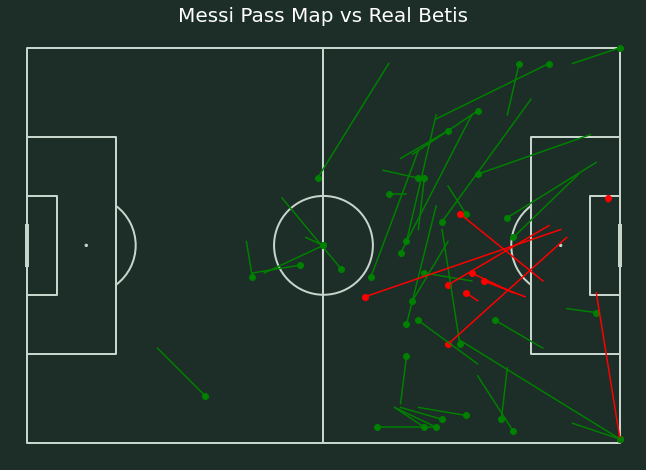

In [8]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#1c2e27')
ax.patch.set_facecolor('#1c2e27')

#Vẽ picth 
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#1c2e27', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
        plt.scatter(df['x'][x],df['y'][x],color='green')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')

plt.title('Messi Pass Map vs Real Betis',color='white',size=20)

Xu hướng chuyền của cầu thủ và độ chính xác của cầu thủ đó.